<a href="https://colab.research.google.com/github/Mike-Xie/DS-Unit-2-Applied-Modeling/blob/master/module4/Mike_Xie_assignment_applied_modeling_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Lambda School Data Science

*Unit 2, Sprint 3, Module 2*

---

# Wrangle ML datasets

- [ ] Continue to clean and explore your data. 
- [ ] For the evaluation metric you chose, what score would you get just by guessing?
- [ ] Can you make a fast, first model that beats guessing?

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - _**[A Kaggle Master Explains Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)**_
  - [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) Chapter 8
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html)
  - _**[Boosting](https://www.youtube.com/watch?v=GM3CDQfQ4sw) (2.5 minute video)**_

In [0]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

In [0]:
!wget https://github.com/bowswung/voobly-scraper/raw/master/data/MatchData/20190208/matchDump.csv.zip

--2019-12-20 07:14:29--  https://github.com/bowswung/voobly-scraper/raw/master/data/MatchData/20190208/matchDump.csv.zip
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/bowswung/voobly-scraper/master/data/MatchData/20190208/matchDump.csv.zip [following]
--2019-12-20 07:14:29--  https://media.githubusercontent.com/media/bowswung/voobly-scraper/master/data/MatchData/20190208/matchDump.csv.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49029198 (47M) [application/zip]
Saving to: ‘matchDump.csv.zip.1’

matchDump.csv.zip.1 100%[===================>]  46.76M   154MB/s    in 0.3s   

In [0]:
!unzip matchDump.csv.zip

Archive:  matchDump.csv.zip
replace matchDump.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [0]:
!head matchDump.csv

MatchId,MatchUrl,MatchDate,MatchDuration,MatchLadder,MatchMap,MatchMods,MatchPlayerId,MatchPlayerName,MatchPlayerTeam,MatchPlayerCivId,MatchPlayerCivName,MatchPlayerWinner,MatchPlayerPreRating,MatchPlayerPostRating,MatchPlayerRecording
17827685,https://www.voobly.com/match/view/17827685,2018-05-27T18:14:00,520,Match Stats Only,=V= CBA Hero AC V13.scx,v1.5 Beta R6,123972487,___Oreo,1,9,Saracens,1,1584,1600,
17827685,https://www.voobly.com/match/view/17827685,2018-05-27T18:14:00,520,Match Stats Only,=V= CBA Hero AC V13.scx,v1.5 Beta R6,125049367,___Dm,2,9,Saracens,0,1616,1600,
17827728,https://www.voobly.com/match/view/17827728,2018-05-27T18:21:00,661,Match Stats Only,=V= CBA Hero AC V13.scx,v1.5 Beta R6,123972487,___Oreo,1,13,Celts,1,1584,1600,
17827728,https://www.voobly.com/match/view/17827728,2018-05-27T18:21:00,661,Match Stats Only,=V= CBA Hero AC V13.scx,v1.5 Beta R6,125049367,___Dm,2,13,Celts,0,1616,1600,
17832641,https://www.voobly.com/match/view/17832641,2018-05-28T11:25:00,762,

In [0]:
import pandas as pd

import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
pd.options.display.max_rows = 999
pd.options.display.max_columns = 100

df = pd.read_csv('matchDump.csv', header=0, engine='python')

cols_to_keep = ['MatchId','MatchMods','MatchMap','MatchLadder','MatchDuration','MatchPlayerTeam','MatchPlayerCivId','MatchPlayerCivName','MatchPlayerWinner','MatchPlayerPreRating']

df = df[cols_to_keep]

df.shape


(1263808, 10)

In [0]:
df.head(5)

,MatchId,MatchMods,MatchMap,MatchLadder,MatchDuration,MatchPlayerTeam,MatchPlayerCivId,MatchPlayerCivName,MatchPlayerWinner,MatchPlayerPreRating
0,17827685,v1.5 Beta R6,=V= CBA Hero AC V13.scx,Match Stats Only,520,1,9,Saracens,1,1584
1,17827685,v1.5 Beta R6,=V= CBA Hero AC V13.scx,Match Stats Only,520,2,9,Saracens,0,1616
2,17827728,v1.5 Beta R6,=V= CBA Hero AC V13.scx,Match Stats Only,661,1,13,Celts,1,1584
3,17827728,v1.5 Beta R6,=V= CBA Hero AC V13.scx,Match Stats Only,661,2,13,Celts,0,1616
4,17832641,v1.5 Beta R6,=V= CBA Hero AC V13.scx,Match Stats Only,762,1,14,Spanish,1,1584


# Choose Target

In [0]:
# I want to predict which player wins

target = 'MatchPlayerWinner'

# This is 50/50 since odds are P1 and evens are P2 for a baseline

In [0]:
df[target].describe()

count     1263808
unique          3
top             0
freq       647589
Name: MatchPlayerWinner, dtype: object

In [0]:
df['MatchLadder'].value_counts()

RM - Team           723786
RM - 1v1            411718
Match Stats Only     81083
DM - Team            40249
DM - 1v1              6972
Name: MatchLadder, dtype: int64

In [0]:
# only do 1v1 on random map game mode

rm_1v1 = df[df['MatchLadder'] == 'RM - 1v1']

# remove ones with errors

rm_1v1 = rm_1v1[rm_1v1.MatchPlayerPreRating != '*VooblyErrorPlayerNotFound*']

# drop matchladder now since it's all the same

rm_1v1 = rm_1v1.drop(labels=['MatchLadder','MatchPlayerCivName','MatchPlayerTeam'], axis=1)

rm_1v1.head()

,MatchId,MatchMods,MatchMap,MatchDuration,MatchPlayerCivId,MatchPlayerWinner,MatchPlayerPreRating
728,18658367,"v1.5 Beta R7, WololoKingdoms",Arabia,1055,16,1,1599
729,18658367,"v1.5 Beta R7, WololoKingdoms",Arabia,1055,11,0,1600
730,18658419,1.4 RC,Custom,3361,18,1,1629
731,18658419,1.4 RC,Custom,3361,17,0,1548
732,18658476,"v1.5 Beta R7, WololoKingdoms",Nomad,3369,6,1,1975


In [0]:
rm_1v1.dtypes

MatchId                  int64
MatchMods               object
MatchMap                object
MatchDuration            int64
MatchPlayerCivId        object
MatchPlayerWinner       object
MatchPlayerPreRating    object
dtype: object

In [0]:
rm_1v1['MatchPlayerCivId'] = rm_1v1['MatchPlayerCivId'].astype(int)
rm_1v1['MatchPlayerWinner'] = rm_1v1['MatchPlayerWinner'].astype(int)
rm_1v1['MatchPlayerPreRating'] = rm_1v1['MatchPlayerPreRating'].astype(int)

In [0]:
rm_1v1.dtypes 

MatchId                  int64
MatchMods               object
MatchMap                object
MatchDuration            int64
MatchPlayerCivId         int64
MatchPlayerWinner        int64
MatchPlayerPreRating     int64
dtype: object

In [0]:
rm_1v1['MatchMods'].describe()

count                           411632
unique                              40
top       v1.5 Beta R7, WololoKingdoms
freq                            293214
Name: MatchMods, dtype: object

In [0]:
rm_1v1['MatchMap'].describe()

count     411632
unique        57
top       Arabia
freq      274278
Name: MatchMap, dtype: object

In [0]:
rm_1v1.tail()

,MatchId,MatchMods,MatchMap,MatchDuration,MatchPlayerCivId,MatchPlayerWinner,MatchPlayerPreRating
1263771,19250562,"v1.5 Beta R7, WololoKingdoms",Arabia,4797,8,0,1695
1263772,19250571,"v1.5 Beta R7, WololoKingdoms",Custom,2501,13,1,1933
1263773,19250571,"v1.5 Beta R7, WololoKingdoms",Custom,2501,12,0,1909
1263774,19250581,"v1.5 Beta R7, WololoKingdoms",Custom,4080,24,1,1542
1263775,19250581,"v1.5 Beta R7, WololoKingdoms",Custom,4080,19,0,1479


In [0]:
y = rm_1v1[target]

y.nunique()

2

In [0]:
y.value_counts() # baseline is 50/50 since only P1 or P2 can win a 1v1

1    205816
0    205816
Name: MatchPlayerWinner, dtype: int64

In [0]:
# ask Shriphani how to drop Voobly Errors

In [0]:
# do this later to feature engineer relative rating by getting P1 and P2 ratings on same row after merge

first_players = rm_1v1[::2]
second_players = rm_1v1[1::2]


first_players.shape, second_players.shape

((205816, 7), (205816, 7))

In [0]:
first_players.head()

,MatchId,MatchMods,MatchMap,MatchDuration,MatchPlayerCivId,MatchPlayerWinner,MatchPlayerPreRating
728,18658367,"v1.5 Beta R7, WololoKingdoms",Arabia,1055,16,1,1599
730,18658419,1.4 RC,Custom,3361,18,1,1629
732,18658476,"v1.5 Beta R7, WololoKingdoms",Nomad,3369,6,1,1975
734,18658489,1.4 RC,Custom,1891,12,1,1415
736,18658492,"v1.5 Beta R7, WololoKingdoms",Custom,3832,22,1,1385


In [0]:
second_players.head()

,MatchId,MatchMods,MatchMap,MatchDuration,MatchPlayerCivId,MatchPlayerWinner,MatchPlayerPreRating
729,18658367,"v1.5 Beta R7, WololoKingdoms",Arabia,1055,11,0,1600
731,18658419,1.4 RC,Custom,3361,17,0,1548
733,18658476,"v1.5 Beta R7, WololoKingdoms",Nomad,3369,17,0,2065
735,18658489,1.4 RC,Custom,1891,18,0,1535
737,18658492,"v1.5 Beta R7, WololoKingdoms",Custom,3832,8,0,1600


In [0]:
p2_names = {
    "MatchPlayerCivId" : "MatchPlayerCivId2",
    "MatchPlayerPreRating" : "MatchPlayerPreRating2",
    "MatchPlayerPostRating" : "MatchPlayerPostRating2"
}

second_players = second_players.rename(columns=p2_names)

drop_cols = ['MatchMods','MatchDuration','MatchPlayerWinner', 'MatchMap']
second_players = second_players.drop(labels=drop_cols, axis=1)

second_players.head()

,MatchId,MatchPlayerCivId2,MatchPlayerPreRating2
729,18658367,11,1600
731,18658419,17,1548
733,18658476,17,2065
735,18658489,18,1535
737,18658492,8,1600


In [0]:
rm_1v1 = first_players.merge(second_players, on='MatchId')


In [0]:
# set matchID as index

rm_1v1 = rm_1v1.set_index('MatchId')

# unfortunately all of the entries are formatted such that P1 is the match winner so we need to shuffle some
# half of it




In [0]:
from sklearn.model_selection import train_test_split

fst, snd = train_test_split(rm_1v1, train_size=0.5, test_size=0.5)

fst.shape, snd.shape

snd_names = {
    "MatchPlayerCivId" : "MatchPlayerCivId2",
    "MatchPlayerPreRating" : "MatchPlayerPreRating2",
    "MatchPlayerPostRating" : "MatchPlayerPostRating2",
    "MatchPlayerCivId2" : "MatchPlayerCivId",
    "MatchPlayerPreRating2" : "MatchPlayerPreRating",
    "MatchPlayerPostRating2" : "MatchPlayerPostRating"
}

snd = snd.rename(columns=snd_names)
snd['MatchPlayerWinner'] = snd['MatchPlayerWinner'].map({1:0})

snd = snd.fillna(0)

snd.head()


,MatchMods,MatchMap,MatchDuration,MatchPlayerCivId2,MatchPlayerWinner,MatchPlayerPreRating2,MatchPlayerCivId,MatchPlayerPreRating
MatchId,,,,,,,,
18908910,v1.5 Beta R7,Custom,3198,10,0,1468,18,1581
19047033,"v1.5 Beta R7, WololoKingdoms",Arabia,1893,15,0,1555,10,1596
19082891,"v1.5 Beta R7, WololoKingdoms",Custom,1094,2,0,2013,19,2190
19207723,"v1.5 Beta R7, WololoKingdoms",Custom,1818,26,0,1445,10,1577
18894597,"v1.5 Beta R7, WololoKingdoms",Arabia,1401,2,0,1681,14,1552


In [0]:
fst.head()

,MatchMods,MatchMap,MatchDuration,MatchPlayerCivId,MatchPlayerWinner,MatchPlayerPreRating,MatchPlayerCivId2,MatchPlayerPreRating2
MatchId,,,,,,,,
18799335,v1.5 Beta R7,Arabia,2927,18,1,1690,16,1667
18919324,v1.5 Beta R7,Nomad,1973,7,1,1697,1,1600
18889235,"v1.5 Beta R7, WololoKingdoms",Arabia,3025,28,1,1537,25,1482
18961453,"v1.5 Beta R7, WololoKingdoms",Arabia,4020,10,1,1652,8,1641
19006161,v1.5 Beta R7,Arabia,2438,17,1,1607,17,1675


In [0]:
rm_1v1 = snd.append(fst, sort=True)

# Feature Engineering 

In [0]:
rm_1v1['EloDifference'] = rm_1v1['MatchPlayerPreRating'] - rm_1v1['MatchPlayerPreRating2']

rm_1v1.head()

,MatchDuration,MatchMap,MatchMods,MatchPlayerCivId,MatchPlayerCivId2,MatchPlayerPreRating,MatchPlayerPreRating2,MatchPlayerWinner,EloDifference
MatchId,,,,,,,,,
18908910,3198,Custom,v1.5 Beta R7,18,10,1581,1468,0,113
19047033,1893,Arabia,"v1.5 Beta R7, WololoKingdoms",10,15,1596,1555,0,41
19082891,1094,Custom,"v1.5 Beta R7, WololoKingdoms",19,2,2190,2013,0,177
19207723,1818,Custom,"v1.5 Beta R7, WololoKingdoms",10,26,1577,1445,0,132
18894597,1401,Arabia,"v1.5 Beta R7, WololoKingdoms",14,2,1552,1681,0,-129


In [0]:
rm_1v1.columns

Index(['MatchDuration', 'MatchMap', 'MatchMods', 'MatchPlayerCivId',
       'MatchPlayerCivId2', 'MatchPlayerPreRating', 'MatchPlayerPreRating2',
       'MatchPlayerWinner', 'EloDifference'],
      dtype='object')

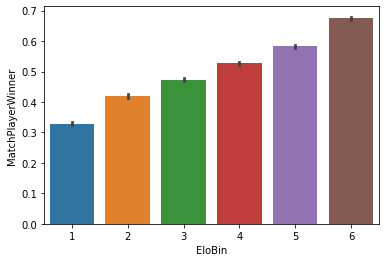

In [0]:
rm_1v1['EloBin'] = pd.qcut(rm_1v1['EloDifference'], 6, labels=[1,2,3,4,5,6])

sns.barplot(x='EloBin', y='MatchPlayerWinner', data=rm_1v1);

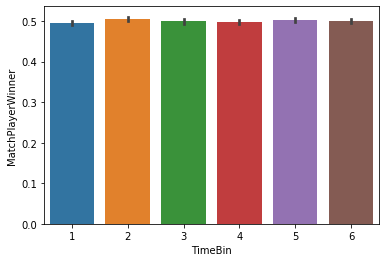

In [0]:
rm_1v1['TimeBin'] = pd.qcut(rm_1v1['MatchDuration'], 6, labels=[1,2,3,4,5,6])

sns.barplot(x='TimeBin', y='MatchPlayerWinner', data=rm_1v1);

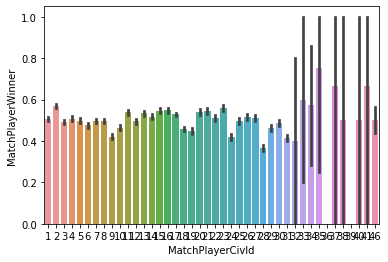

In [0]:
sns.barplot(x='MatchPlayerCivId', y='MatchPlayerWinner', data=rm_1v1); 

# ok prob bin some of the less popular ones together



In [0]:
rm_1v1['MatchPlayerCivId'].value_counts()

17    15442
12     8185
13     7902
7      7883
16     7870
2      7822
15     7800
11     7739
1      7675
14     7533
18     7522
6      7493
5      7480
4      7480
3      7449
10     7316
9      7281
8      7255
26     4790
23     4787
22     4781
20     4712
21     4689
19     4642
27     4638
28     4604
29     4584
24     4571
31     4559
30     4556
25     4501
46      241
34        7
33        5
32        5
35        4
41        3
37        3
38        2
39        2
40        2
36        1
Name: MatchPlayerCivId, dtype: int64

In [0]:
rm_1v1.columns

Index(['MatchDuration', 'MatchMap', 'MatchMods', 'MatchPlayerCivId',
       'MatchPlayerCivId2', 'MatchPlayerPreRating', 'MatchPlayerPreRating2',
       'MatchPlayerWinner', 'EloDifference', 'EloBin'],
      dtype='object')

In [0]:
rm_1v1.head()

,MatchDuration,MatchMap,MatchMods,MatchPlayerCivId,MatchPlayerCivId2,MatchPlayerPreRating,MatchPlayerPreRating2,MatchPlayerWinner,EloDifference,EloBin
MatchId,,,,,,,,,,
18908910,3198,Custom,v1.5 Beta R7,18,10,1581,1468,0,113,"(77.0, 1005.0]"
19047033,1893,Arabia,"v1.5 Beta R7, WololoKingdoms",10,15,1596,1555,0,41,"(32.0, 77.0]"
19082891,1094,Custom,"v1.5 Beta R7, WololoKingdoms",19,2,2190,2013,0,177,"(77.0, 1005.0]"
19207723,1818,Custom,"v1.5 Beta R7, WololoKingdoms",10,26,1577,1445,0,132,"(77.0, 1005.0]"
18894597,1401,Arabia,"v1.5 Beta R7, WololoKingdoms",14,2,1552,1681,0,-129,"(-1007.001, -77.0]"


# FIT MODEL

In [0]:
rm_1v1.describe()

from sklearn.model_selection import train_test_split

train, val = train_test_split(rm_1v1, train_size = 0.8, test_size = 0.2)

train.shape, val.shape

((164652, 10), (41164, 10))

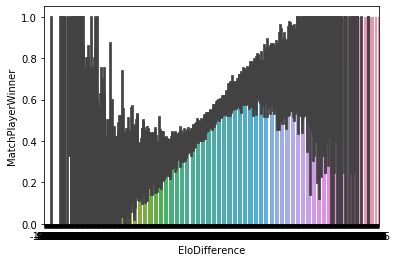

In [0]:
import seaborn as sns

sns.barplot(x='EloDifference', y='MatchPlayerWinner', data=rm_1v1);

In [0]:
# run a model better than baseline 
target = 'MatchPlayerWinner'
features = [
            'MatchMods', 
            'MatchMap', 
            'MatchDuration',
      #  'MatchPlayerCivId', 
       # 'MatchPlayerPreRating',
     #   'MatchPlayerCivId2', 
       # 'MatchPlayerPreRating2',
        'EloDifference', 
        'EloBin']
# looks sparse need to make a lot of feature engineering later
X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]


# Train Accuracy 1.0 Still Not Sure Why

In [0]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    #RandomForestClassifier(n_estimators = 100, n_jobs=-1)
    DecisionTreeClassifier(random_state=42)
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_val)

print('Train Accuracy', pipeline.score(X_train, y_train))

# well, that's, not good

Train Accuracy 0.9869968175303063


In [0]:
print('Validation Accuracy', pipeline.score(X_val, y_val))

# fail

Validation Accuracy 0.5293460305120979


In [0]:
rm_1v1['EloDifference'].describe()

# Visualization of Random Forest See Why It Fails

In [0]:
# import graphviz
# from sklearn.tree import export_graphviz

# model = pipeline.named_steps['decisiontreeclassifier']
# encoder = pipeline.named_steps['ordinalencoder']
# encoded_columns = encoder.transform(X_val).columns



# dot_data = export_graphviz(model, 
#                            out_file=None, 
#                            max_depth=3, 
#                            feature_names=encoded_columns,
#                            class_names=model.classes_, 
#                            impurity=False, 
#                            filled=True, 
#                            proportion=True, 
#                            rounded=True)   
# display(graphviz.Source(dot_data))

# # not sure why suddenly broken

# Wednesday XBG Boost 

In [0]:
rf = pipeline.named_steps['decisiontreeclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n=20

plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

# Thursday PDP and Shapely Plots

In [0]:
sns.distplot(y_train);

In [0]:
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr = make_pipeline(
    ce.TargetEncoder(),  
    LinearRegression()
)

lr.fit(X_train, y_train)
print('Linear Regression R^2', lr.score(X_val, y_val))

In [0]:
# oh god these coeffficients are so low

from sklearn.metrics import r2_score
from xgboost import XGBRegressor

gb = make_pipeline(
    ce.OrdinalEncoder(),
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_val)
print('Gradient Boosting R^2', r2_score(y_val, y_pred))

In [0]:
# increase the dots per inch (double it), so the text isn't so fuzzy
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

In [0]:
if 'google.colab' in sys.modules:

      !pip install pdpbox
      !pip install shap

from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'EloDifference'

isolated = pdp_isolate(
    model=gb, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature)

In [0]:
# Plot PDP with 100 ICE curves
# PDP: Partial Dependence Plot
# ICE: Individual Conditional Expectation
pdp_plot(isolated, feature_name=feature, plot_lines=True, 
         frac_to_plot=0.01)

plt.xlim(-1000,1000);